In [1]:
import pandas as pd
from utilities_DL import get_DataSet_and_invalid_dates,get_MultiModel_loss_args_emb_opts,load_init_trainer
from DL_class import MultiModelTrainer, Trainer
from config import get_args
from save_results import build_results_df
from paths import folder_path,file_name,get_save_directory
import torch
from plotting import plot_k_fold_split

# ==== GET PARAMETERS ====
# Load config
model_name ='DCRNN' #'MTGNN' # 'STGCN'  #'CNN' # 
args = get_args(model_name)

# Modification :
args.epochs = 100
args.K_fold = 6   # Means we will use the first fold for the Ray Tuning and the 5 other ones to get the metrics
if torch.cuda.is_available():
    args.device = 'cuda:0'
    args.batch_size = 256
    args.single_station = False
else :
    args.device = 'cpu'
    args.batch_size = 32
    args.single_station = False

args.ray = False

args.loss_function_type = 'quantile'  #'MSE' #

if args.loss_function_type == 'MSE':
    args.out_dim = 1
    args.alpha = None
    args.type_calendar = 'tuple'

else:
    args.embedding_dim = 3
    args.calendar_class = 3
    args.position = 'input'
    args.specific_lr = False
    args.type_calendar = 'tuple'
    args.out_dim = 2
    args.alpha = 0.1

Training and Hyper-parameter tuning with Ray is not possible


# Sliding Window Cross Validation 
## Define fixed Dataset K_fold split for each trial: 

coverage period: 2019-01-01 00:00:00 - 2020-01-01 00:00:00
Time-step per hour: 4.0


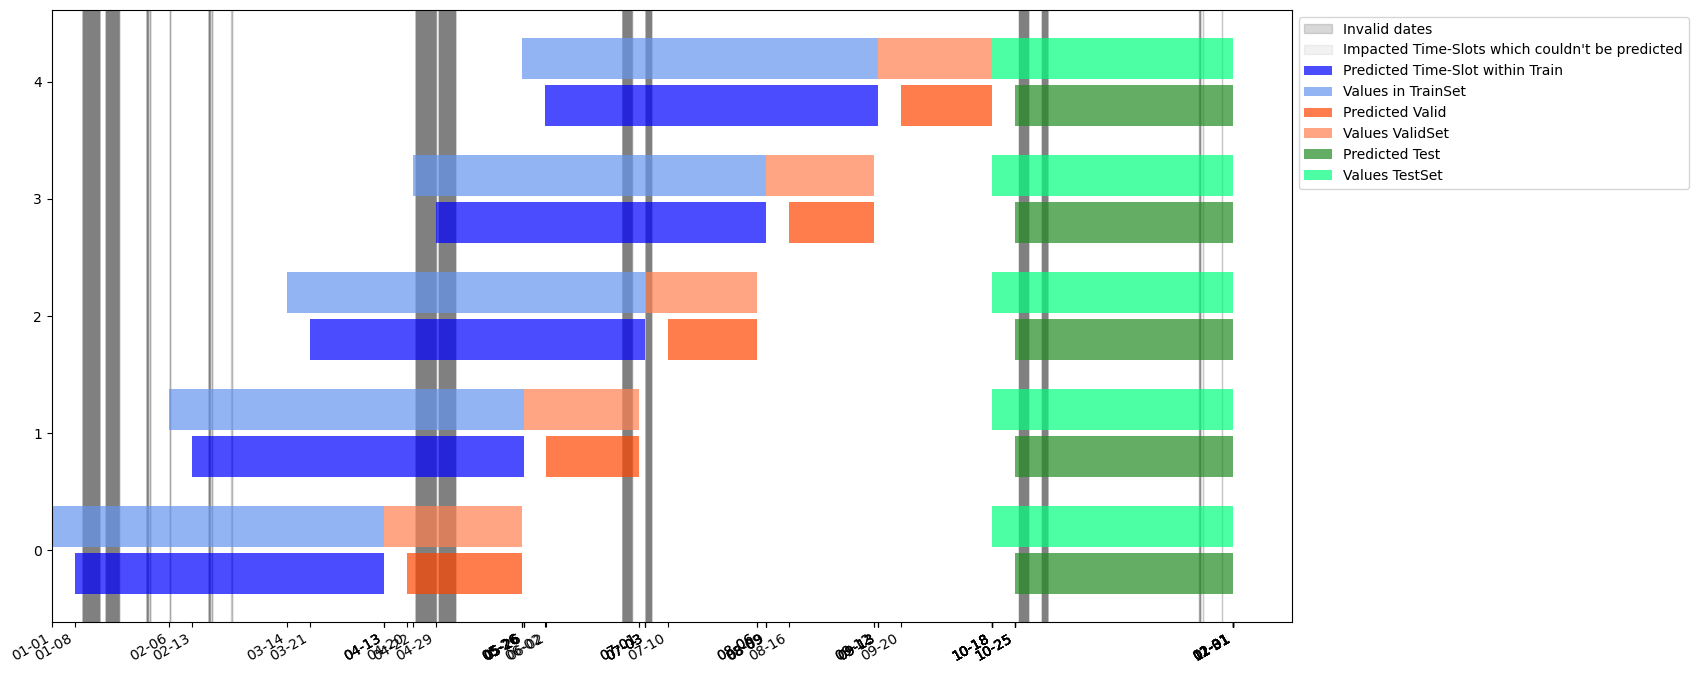

In [2]:
# Load dataset and invalid_dates
dataset,invalid_dates = get_DataSet_and_invalid_dates(args.abs_path,folder_path,file_name,args.W,args.D,args.H,args.step_ahead,single_station = False)

# Train / Valid / Test split and Normalize for K-fold 
(Datasets,DataLoader_list,time_slots_labels_list,dic_class2rpz,dic_rpz2class,nb_words_embedding) =  dataset.split_K_fold(args,invalid_dates)

# Plot information about split and folds:
plot_k_fold_split(Datasets,invalid_dates)

In [2]:
results_df = pd.DataFrame()
save_dir = get_save_directory(args)

Datasets,DataLoader_list,dic_class2rpz,nb_words_embedding,time_slots_labels,dic_rpz2class = load_init_trainer(folder_path,file_name,args)
(loss_function,Model_list,Optimizer_list,Scheduler_list,args_embedding) = get_MultiModel_loss_args_emb_opts(args,nb_words_embedding,dic_class2rpz,n_vertex = len(Datasets[0].columns))
Datasets,DataLoader_list,Model_list,Optimizer_list,Scheduler_list = Datasets[1:],DataLoader_list[1:],Model_list[1:],Optimizer_list[1:],Scheduler_list[1:]

multimodeltrainer = MultiModelTrainer(Datasets,Model_list,DataLoader_list,args,Optimizer_list,loss_function,Scheduler_list,args_embedding=args_embedding,save_dir = save_dir,dic_class2rpz=dic_class2rpz)

(results_by_fold,mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds) = multimodeltrainer.K_fold_validation(mod_plot = 10)
results_by_fold.to_csv(f"{save_dir}results_by_fold.csv")

# Svae results 
results_df = build_results_df(results_df,args, mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds)
results_df.to_csv(f"{args.model_name}_{args.loss_function_type}_H{args.H}_D{args.D}_W{args.W}_E{args.epochs}_K_fold{args.K_fold}_Emb_dim{args.embedding_dim}FC1_17_8_FC2_8_4_save_results.csv")

coverage period: 2019-01-01 00:00:00 - 2020-01-01 00:00:00
Time-step per hour: 4.0


K_fold 0
start training
epoch: 0 
 min\epoch : 0.04
Estimated time for training: 3.6min 


/Users/romainrochas/opt/anaconda3/envs/ray/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


K_fold 1
start training
epoch: 0 
 min\epoch : 0.04
Estimated time for training: 3.5min 


/Users/romainrochas/opt/anaconda3/envs/ray/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


K_fold 2
start training
epoch: 0 
 min\epoch : 0.04
Estimated time for training: 3.9min 


/Users/romainrochas/opt/anaconda3/envs/ray/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


KeyboardInterrupt: 

# Get Parameters : 

In [ ]:
# Load config
model_name = 'STGCN' #'CNN' 
args = get_args(model_name)
#args = get_args(model_name = model_name,learn_graph_structure = True)  # MTGNN

# Modification : 
args.epochs = 1
args.K_fold = 1

args.loss_function_type = 'MSE'
args.out_dim = 1
args.alpha = None
# Save Directory:
main_dir = get_save_directory(args)

# Test complet sur les 3 Top STGCN, avec sauvegarde du model :

In [ ]:
results_df = pd.DataFrame()

#for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3,1,3],['input','input','input'],[True,True,False],['tuple','tuple','tuple'])):
for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3],['input'],[True],['tuple'])):

    args.calendar_class = calendar_class
    args.position = position
    args.specific_lr = specific_lr
    args.type_calendar = type_calendar

    save_dir = get_save_directory(args)

    # Load dataset and invalid_dates 
    dataset,invalid_dates = get_DataSet_and_invalid_dates(folder_path,file_name,args.W,args.D,args.H,args.step_ahead,single_station = False)
    (Datasets,DataLoader_list,time_slots_labels,dic_class2rpz,dic_rpz2class,nb_words_embedding) =  dataset.split_K_fold(args,invalid_dates)
    
    # Load associated K_folds Models: 
    (loss_function,Model_list,Optimizer_list,args_embedding) = get_MultiModel_loss_args_emb_opts(args,nb_words_embedding,dic_class2rpz)
    multimodeltrainer = MultiModelTrainer(Datasets,Model_list,DataLoader_list,args,Optimizer_list,loss_function,scheduler = None,args_embedding=args_embedding,ray= False,save_dir = save_dir,dic_class2rpz=dic_class2rpz)
    (results_by_fold,mean_picp,mean_mpiw,dict_last,dict_scores) = multimodeltrainer.K_fold_validation(mod_plot = 1)
    results_by_fold.to_csv(f"{save_dir}results_by_fold.csv")
    
    # Svae results 
    results_df = build_results_df(results_df,args, mean_picp,mean_mpiw,dict_last,dict_scores)
                            
results_df.to_csv('save_results.csv')
results_df

In [ ]:
# ==== GET PARAMETERS ====
# Load config
model_name = 'STGCN' #'CNN' 
args = get_args(model_name)
#args = get_args(model_name = model_name,learn_graph_structure = True)  # MTGNN

# Modification : 
args.epochs = 300

# Save Directory:
main_dir = get_save_directory(args)
args.H = 0
args.W = 0
args.D = 0
args.L =args.H+args.W+args.D
args.single_station = True
# ==== TEST  ====
for K_fold in [5]:
    args.K_fold = K_fold
    results_df = pd.DataFrame()

    #for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3,1,3],['input','input','input'],[True,True,False],['tuple','tuple','tuple'])):
    #for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3],['input'],[True],['tuple'])):
    for i,(embedding_dim,calendar_class,position,specific_lr, type_calendar,time_embedding) in enumerate(zip([3], # None
                                                                                                             [3], # 3
                                                                                               ['input'], # None
                                                                                               [False], # None 
                                                                                               ['tuple'], # None
                                                                                               [True] # False
                                                                                              )
                                                                                            ):
        args.embedding_dim = embedding_dim
        args.calendar_class = calendar_class
        args.position = position
        args.specific_lr = specific_lr
        args.type_calendar = type_calendar
        args.time_embedding = time_embedding

        save_dir = get_save_directory(args)

        # Load dataset and invalid_dates 
        dataset,invalid_dates = get_DataSet_and_invalid_dates(folder_path,file_name,args.W,args.D,args.H,args.step_ahead,single_station = args.single_station)
        (Datasets,DataLoader_list,time_slots_labels,dic_class2rpz,dic_rpz2class,nb_words_embedding) =  dataset.split_K_fold(args,invalid_dates)

        # Load associated K_folds Models: 
        (loss_function,Model_list,Optimizer_list,args_embedding) = get_MultiModel_loss_args_emb_opts(args,nb_words_embedding,dic_class2rpz)
        multimodeltrainer = MultiModelTrainer(Datasets,Model_list,DataLoader_list,args,Optimizer_list,loss_function,scheduler = None,args_embedding=args_embedding,ray= False,save_dir = save_dir,dic_class2rpz=dic_class2rpz)
        
        (results_by_fold,mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds) = multimodeltrainer.K_fold_validation(mod_plot = 10)
        results_by_fold.to_csv(f"{save_dir}results_by_fold.csv")

        # Svae results 
        results_df = build_results_df(results_df,args, mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds)
        results_df.to_csv(f"{args.model_name}_H{args.H}_D{args.D}_W{args.W}_E{args.epochs}_K_fold{args.K_fold}_Emb_dim{args.embedding_dim}FC1_17_8_FC2_8_4_save_results.csv")